# Databricks

https://databricks.com

In [ ]:
# !pip install pyspark

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import array
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree
from pyspark import SparkConf, SparkContext
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
# Some functions that convert our CSV input data into numerical
# features for each job candidate
def binary(YN):# To be completed by Student
    if (type(YN) != str): return YN # if it has been converted to binary, return orignal value
    if (YN == 'yes' or YN == 'Yes'):
        return 1
    else:
        return 0

def mapSex(degree): # To be completed by Student
    if(type(degree) != str): return degree # if it has been converted to binary, return orignal value
    if (degree == 'f'):
        return 1
    else:
        return 0

def mapEthnicity(ethnic): # To be completed by Student 
    if (type(ethnic) != str): return ethnic # if it has been converted to binary, return orignal value
    if(ethnic == 'asian'):
        return 1
    else:
        return 0

def mapAssessor(assessor): # To be completed by Student 
    if (type(assessor) != str): return assessor # if it has been converted to binary, return orignal value
    if(assessor == 'Health Care Professional'):
        return 1
    else:
        return 0


In [ ]:
# Convert a list of raw fields from our CSV file to a
# LabeledPoint that MLLib can use. All data must be numerical...
# def createLabeledPoints(fields):
#     ageMonths = int(fields[0])
#     sex = mapSex(fields[1])
#     Ethnicity = mapEthnicity(fields[2])
#     jaundice = binary(fields[3])
#     hereditary = binary(fields[4])
#     asd = binary(fields[5])
     

#     return LabeledPoint(asd, array([ageMonths,sex,
#         Ethnicity, jaundice, hereditary]))

  
def createLabeledPoints(fields):
    A1 = int(fields[0])
    A2 = int(fields[1])
    A3 = int(fields[2])
    A4 = int(fields[3])
    A5 = int(fields[4])
    A6 = int(fields[5])
    A7 = int(fields[6])
    A8 = int(fields[7])
    A9 = int(fields[8])
    A10 = int(fields[9])
    ageMonths = int(fields[10])
    sex = mapSex(fields[11])
    Ethnicity = mapEthnicity(fields[12])
    jaundice = binary(fields[13])
    hereditary = binary(fields[14])
    Assessor = mapAssessor(fields[15])
    asd = binary(fields[16])

    return LabeledPoint(asd, array([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, ageMonths, sex,
        Ethnicity, jaundice, hereditary, Assessor]))


In [ ]:
#Load up our CSV file, and filter out the header line with the column names
rawData = sc.textFile("/FileStore/tables/Toddler_Autism_dataset_BigData.csv")
header = rawData.first()
rawData = rawData.filter(lambda x:x != header)


In [ ]:
# Split each line into a list based on the comma delimiters
csvData = rawData.map(lambda x: x.split(","))

In [ ]:
# Convert these lists to LabeledPoints
trainingData = csvData.map(createLabeledPoints)

In [ ]:
# # Train our DecisionTree classifier using our data set
# model = DecisionTree.trainClassifier(trainingData, numClasses=2,
#                                      categoricalFeaturesInfo={1:2, 2:6, 3:2, 4:2},
#                                      impurity='gini', maxDepth=5, maxBins=32)

model = DecisionTree.trainClassifier(trainingData, numClasses=2,
                                     categoricalFeaturesInfo={11:2, 12:6, 13:2, 14:2, 15:4},
                                     impurity='gini', maxDepth=5, maxBins=32)

In [ ]:
# Create a test candidate
# testCandidates = [ array([36, 0, 2, 1, 0])] # test different candidates
testCandidates = [ array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 36, 0, 2, 1, 0, 1])] # test different candidates
testData = sc.parallelize(testCandidates)

In [ ]:
# Now get predictions (Note, you could separate
# the source data into a training set and a test set while tuning
# parameters and measure accuracy as you go!)
predictions = model.predict(testData)
print('ASD prediction:')
results = predictions.collect()
for result in results:
    print(result)

ASD prediction:
1.0


In [ ]:
# We can also print out the decision tree itself:
print('Learned classification tree model:')
print(model.toDebugString())

Learned classification tree model:
DecisionTreeModel classifier of depth 5 with 35 nodes
  If (feature 8 <= 0.5)
   If (feature 6 <= 0.5)
    If (feature 7 <= 0.5)
     If (feature 3 <= 0.5)
      Predict: 0.0
     Else (feature 3 > 0.5)
      If (feature 9 <= 0.5)
       Predict: 0.0
      Else (feature 9 > 0.5)
       Predict: 1.0
    Else (feature 7 > 0.5)
     If (feature 5 <= 0.5)
      If (feature 1 <= 0.5)
       Predict: 0.0
      Else (feature 1 > 0.5)
       Predict: 1.0
     Else (feature 5 > 0.5)
      Predict: 1.0
   Else (feature 6 > 0.5)
    If (feature 1 <= 0.5)
     If (feature 4 <= 0.5)
      If (feature 0 <= 0.5)
       Predict: 0.0
      Else (feature 0 > 0.5)
       Predict: 1.0
     Else (feature 4 > 0.5)
      Predict: 1.0
    Else (feature 1 > 0.5)
     Predict: 1.0
  Else (feature 8 > 0.5)
   If (feature 5 <= 0.5)
    If (feature 6 <= 0.5)
     If (feature 7 <= 0.5)
      If (feature 1 <= 0.5)
       Predict: 0.0
      Else (feature 1 > 0.5)
       Predict: 1.0

---
`The end is also called the new start.` --- ISS : **I** **S**(elf) **S**(tudy)

---
### Interpret Decision tree result, e.g. which feature is most important on toddler ASD detection: different ethnicity? age?

Chang Siang: Based on the results above, feature 8 (Question A9), feature 6(Question A7) and feature 5(Question A5) are most important on toddler ASD detection, as it has the best discrimination of ASD vs Non-ASD samples.

In [ ]:
# [Optional Task]
# Ignore above and spit data between training set and test set
asd_labels = trainingData.map(lambda x: x.label)
asd_features = trainingData.map(lambda x: x.features)
Y_classification = np.array(asd_labels.collect())
X = np.array(asd_features.collect())
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1/3, random_state=1, stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

(693979, 16)
(346990, 16)


In [ ]:
joined_train_set = np.column_stack((X_train, y_train)) # joined the asd result with the feature array
split_trainingData = sc.parallelize(joined_train_set).map(createLabeledPoints) # createLabeledPoints variable for pyspark model training

# run the training again with split data set (1:3)
model = DecisionTree.trainClassifier(split_trainingData, numClasses=2, 
                                     categoricalFeaturesInfo={11:2, 12:6, 13:2, 14:2, 15:4}, 
                                     impurity='gini', maxDepth=5, maxBins=32)

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
# test the re-trained model
testData = sc.parallelize(X_test)
predictions = model.predict(testData)
predictionsAndLabels = np.column_stack((predictions.collect(), y_test)).tolist() # create an array with prediction and labels side by side
predictionsAndLabels = sc.parallelize(predictionsAndLabels)
metrics = MulticlassMetrics(predictionsAndLabels) # plot confusion matrix to visualised model accuracy

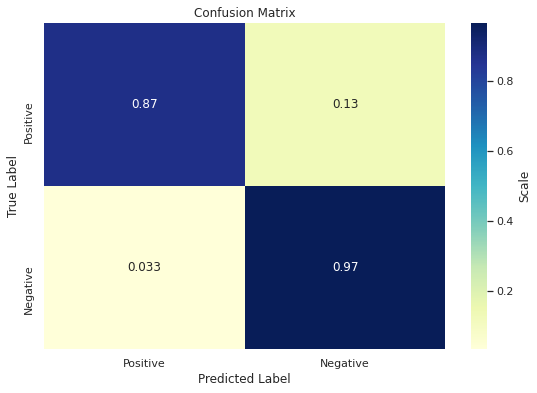

Out[79]: 0.938021268624456

In [ ]:
import seaborn # use seaborn for visualization to make my life easy

confusion_matrix = metrics.confusionMatrix().toArray()
confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis] # normalized the scale 0 - 1

seaborn.set(color_codes=True)
plt.figure(1, figsize=(9, 6))
plt.title("Confusion Matrix")
fig = seaborn.heatmap(confusion_matrix_normalized, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
fig.set_xticklabels(['Positive', 'Negative'])
fig.set_yticklabels(['Positive', 'Negative'])
fig.set(ylabel="True Label", xlabel="Predicted Label")
plt.show(fig)
metrics.accuracy

In [ ]:
# Perform one-hot encoding for multi-categorical variables 
from pyspark.ml.feature import OneHotEncoder

ethnic_indexer = StringIndexer(inputCol="Ethnicity", outputCol="EthnicityNumericIndex")
ethnic_onehotencode = OneHotEncoder(inputCol="EthnicityNumericIndex", outputCol="EthnicityOHEVector")
data_df = spark.read.option("header", True).csv("/FileStore/tables/Toddler_Autism_dataset_BigData.csv")
data_df = ethnic_indexer.fit(data_df).transform(data_df)
data_df = ethnic_onehotencode.fit(data_df).transform(data_df)


In [ ]:
data_df.first()['EthnicityOHEVector'].toArray()

Out[81]: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# perform data preprocessing again
csvData = data_df.rdd.map(list)
header = rawData.first()
csvData = csvData.filter(lambda x:x != header)
# Run the same model classifier again
# Evaluate model again using confusion matrix

In [ ]:
from pyspark.ml.linalg import Vectors

# rewrite createLabeledPointsMethod
def createLabeledPoints(fields):
    A1 = int(fields[0])
    A2 = int(fields[1])
    A3 = int(fields[2])
    A4 = int(fields[3])
    A5 = int(fields[4])
    A6 = int(fields[5])
    A7 = int(fields[6])
    A8 = int(fields[7])
    A9 = int(fields[8])
    A10 = int(fields[9])
    ageMonths = int(fields[10])
    sex = mapSex(fields[11])
    Ethnicity = mapEthnicity(fields[12])
    jaundice = binary(fields[13])
    hereditary = binary(fields[14])
    Assessor = mapAssessor(fields[15])
    asd = binary(fields[16])
    EthnicityNumericIndex = int(fields[17])
    EthnicityOHEVector = fields[18].toArray()
    features = array([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, ageMonths, sex, 
                                    jaundice, hereditary]) # Here, we drop the variable Ethnicity, EthnicityNumericIndex and Assessor vector 
                     
    #return LabeledPoint(asd, array([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, ageMonths, sex,
    #    Ethnicity, jaundice, hereditary, Assessor, EthnicityNumericIndex, EthnicityOHEVector]))
    
    return LabeledPoint(asd, np.concatenate((features, EthnicityOHEVector), axis=None).tolist()) 

def createLabeledPointsWithOHE(fields):
    A1 = int(fields[0])
    A2 = int(fields[1])
    A3 = int(fields[2])
    A4 = int(fields[3])
    A5 = int(fields[4])
    A6 = int(fields[5])
    A7 = int(fields[6])
    A8 = int(fields[7])
    A9 = int(fields[8])
    A10 = int(fields[9])
    ageMonths = int(fields[10])
    sex = mapSex(fields[11])
    jaundice = binary(fields[12])
    hereditary = binary(fields[13])
    EthnicityOHEVector0 = int(fields[14])
    EthnicityOHEVector1 = int(fields[15])
    EthnicityOHEVector2 = int(fields[16])
    EthnicityOHEVector3 = int(fields[17])
    EthnicityOHEVector4 = int(fields[18])
    EthnicityOHEVector5 = int(fields[19])
    EthnicityOHEVector6 = int(fields[20])
    EthnicityOHEVector7 = int(fields[21])
    EthnicityOHEVector8 = int(fields[22])
    EthnicityOHEVector9 = int(fields[23])
    asd = binary(fields[24])
                     
    #return LabeledPoint(asd, array([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, ageMonths, sex,
    #    Ethnicity, jaundice, hereditary, Assessor, EthnicityNumericIndex, EthnicityOHEVector]))
    
    return LabeledPoint(asd, array([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, ageMonths, sex, jaundice, 
                                   hereditary, EthnicityOHEVector0, EthnicityOHEVector1, EthnicityOHEVector2, EthnicityOHEVector3, EthnicityOHEVector4,
                                   EthnicityOHEVector5, EthnicityOHEVector6, EthnicityOHEVector7, EthnicityOHEVector8, EthnicityOHEVector9])) 

In [ ]:
# create an array of LabeledPoint training data
trainingData = csvData.map(createLabeledPoints)
asd_labels = trainingData.map(lambda x: x.label)
asd_features = trainingData.map(lambda x: x.features)
Y_classification = np.array(asd_labels.collect())
X = np.array(asd_features.collect())

#do a 1:3 split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1/3, random_state=1, stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

(693979, 24)
(346990, 24)


In [ ]:
# redo the training again 

joined_train_set = np.column_stack((X_train, y_train)) # joined the asd result with the feature array
split_trainingData = sc.parallelize(joined_train_set).map(createLabeledPointsWithOHE) # createLabeledPoints variable for pyspark model training

# run the training again with split data set (1:3)
model = DecisionTree.trainClassifier(split_trainingData, numClasses=2, 
                                     categoricalFeaturesInfo={11:2, 12:2, 13:2}, 
                                     impurity='gini', maxDepth=5, maxBins=32)

In [ ]:
# test the new model with EthnicityOHEVector
testData = sc.parallelize(X_test)
predictions = model.predict(testData)
predictionsAndLabels = np.column_stack((predictions.collect(), y_test)).tolist() # create an array with prediction and labels side by side
predictionsAndLabels = sc.parallelize(predictionsAndLabels)
metrics = MulticlassMetrics(predictionsAndLabels) # plot confusion matrix to visualised model accuracy

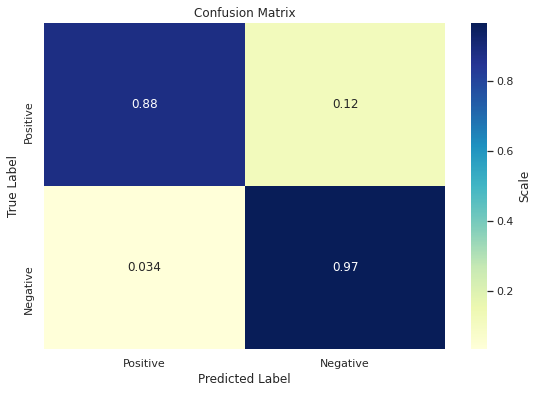

Out[87]: 0.9389751866048013

In [ ]:
confusion_matrix = metrics.confusionMatrix().toArray()
confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis] # normalized the scale 0 - 1

seaborn.set(color_codes=True)
plt.figure(1, figsize=(9, 6))
plt.title("Confusion Matrix")
fig = seaborn.heatmap(confusion_matrix_normalized, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
fig.set_xticklabels(['Positive', 'Negative'])
fig.set_yticklabels(['Positive', 'Negative'])
fig.set(ylabel="True Label", xlabel="Predicted Label")
plt.show(fig)
metrics.accuracy

In [ ]:
# I have tried to use the Feature Selection Tools that comes along with PySpark
# But i kept having technical difficulty in doing that. So instead, I will qualitatively evaluate the tree and pick the features by hand.. LOL.
# Hope Sam will provide some tips on feature selection

print('Learned classification tree model:')
print(model.toDebugString())

Learned classification tree model:
DecisionTreeModel classifier of depth 5 with 39 nodes
  If (feature 8 <= 0.5)
   If (feature 6 <= 0.5)
    If (feature 7 <= 0.5)
     If (feature 3 <= 0.5)
      Predict: 0.0
     Else (feature 3 > 0.5)
      If (feature 9 <= 0.5)
       Predict: 0.0
      Else (feature 9 > 0.5)
       Predict: 1.0
    Else (feature 7 > 0.5)
     If (feature 1 <= 0.5)
      If (feature 5 <= 0.5)
       Predict: 0.0
      Else (feature 5 > 0.5)
       Predict: 1.0
     Else (feature 1 > 0.5)
      Predict: 1.0
   Else (feature 6 > 0.5)
    If (feature 1 <= 0.5)
     If (feature 4 <= 0.5)
      If (feature 0 <= 0.5)
       Predict: 0.0
      Else (feature 0 > 0.5)
       Predict: 1.0
     Else (feature 4 > 0.5)
      Predict: 1.0
    Else (feature 1 > 0.5)
     Predict: 1.0
  Else (feature 8 > 0.5)
   If (feature 5 <= 0.5)
    If (feature 6 <= 0.5)
     If (feature 7 <= 0.5)
      If (feature 1 <= 0.5)
       Predict: 0.0
      Else (feature 1 > 0.5)
       Predict: 1.0

In [ ]:
def createLabeledPointsWithSelectedFeatures(fields):
    A1 = int(fields[0])
    A2 = int(fields[1])
    A3 = int(fields[2])
    A4 = int(fields[3])
    A5 = int(fields[4])
    A6 = int(fields[5])
    A7 = int(fields[6])
    A8 = int(fields[7])
    A9 = int(fields[8])
    A10 = int(fields[9])
    ageMonths = int(fields[10])
    sex = mapSex(fields[11])
    jaundice = binary(fields[12])
    hereditary = binary(fields[13])
    EthnicityOHEVector0 = int(fields[14])
    EthnicityOHEVector1 = int(fields[15])
    EthnicityOHEVector2 = int(fields[16])
    EthnicityOHEVector3 = int(fields[17])
    EthnicityOHEVector4 = int(fields[18])
    EthnicityOHEVector5 = int(fields[19])
    EthnicityOHEVector6 = int(fields[20])
    EthnicityOHEVector7 = int(fields[21])
    EthnicityOHEVector8 = int(fields[22])
    EthnicityOHEVector9 = int(fields[23])
    asd = binary(fields[24])
    # Select feature 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 17
    # Feature A1, A2, A4, A5, A6, A7, A8, A9, A10, ageMonths, EthnicityOHEVector3
    return LabeledPoint(asd, array([A1, A2, A4, A5, A6, A7, A8, A9, A10, ageMonths, EthnicityOHEVector3])) 

In [ ]:
split_trainingData = sc.parallelize(joined_train_set).map(createLabeledPointsWithSelectedFeatures) # createLabeledPoints variable for pyspark model training

# run the training again with split data set (1:3)
model = DecisionTree.trainClassifier(split_trainingData, numClasses=2, 
                                     categoricalFeaturesInfo={10:2}, 
                                     impurity='gini', maxDepth=5, maxBins=32)

In [ ]:
predictions = model.predict(testData)
predictionsAndLabels = np.column_stack((predictions.collect(), y_test)).tolist() # create an array with prediction and labels side by side
predictionsAndLabels = sc.parallelize(predictionsAndLabels)
metrics = MulticlassMetrics(predictionsAndLabels) # plot confusion matrix to visualised model accuracy

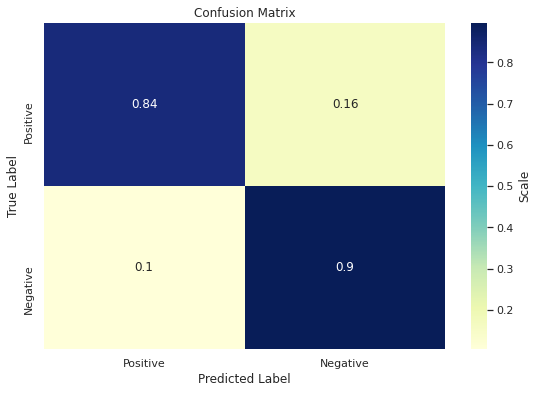

Out[92]: 0.8777889852733508

In [ ]:
confusion_matrix = metrics.confusionMatrix().toArray()
confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis] # normalized the scale 0 - 1

seaborn.set(color_codes=True)
plt.figure(1, figsize=(9, 6))
plt.title("Confusion Matrix")
fig = seaborn.heatmap(confusion_matrix_normalized, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
fig.set_xticklabels(['Positive', 'Negative'])
fig.set_yticklabels(['Positive', 'Negative'])
fig.set(ylabel="True Label", xlabel="Predicted Label")
plt.show(fig)
metrics.accuracy

In [ ]:
# Model Accuracy
# Without One Hot Encoding (OHE) of Ethnicity: 0.938021268624456
# With OHE of Ethnicity: 0.9389751866048013
# With feature reduction: 0.8777889852733508

# Chang Siang's comment: Based on the result above, it shows that we can improve the model performance slightly by perform One-Hot Encoding of multi-categorical variable, 
# instead of just converting Ethnicity to binary based on whether the patient is "asian" or not.
# However, it also demostrated that Ethnicity do not have very much influence on the diagonosis of ASD.
# Upon feature reduction , the model accuracy dropped to 0.878, resulting in 3x increased probability of false positive.
# However, the model still perform reliably in determining true positive and true negative.